In [156]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Linear Regression

In this lab, we are going to implement a Linear Regression model "by hand" and also use sklearn to implement linear regressors using different basis functions, and then add regularization to the models.



## Part 1 - Synthetic and real datasets

* Generate 50 points in a line in the interval $[0, 10]$ for `x`, perturbed by a small gaussian noise. For example, `y = 2 * x + 5 + noise` where `noise` is taken from a normal distribution.
* plot the generated data as a scatter plot, and the line without noise as a reference

*Note:* If you want to generate the same data as I generated, use $y = 3x + 5 + \epsilon$ after setting the random seed to 0

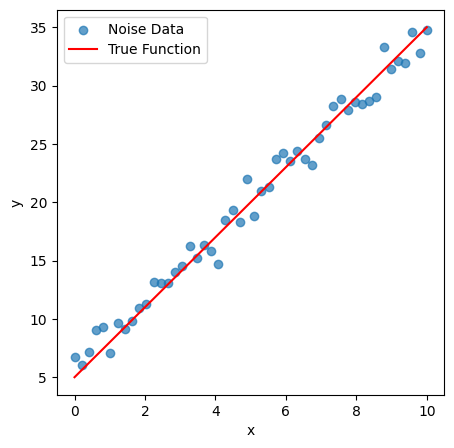

In [157]:
np.random.seed(0)

x = np.linspace(0, 10, 50)

noise = np.random.normal(0, 1, 50)

y = 3*x + 5 + noise

plt.figure(figsize=(5,5))
plt.scatter(x, y, label = 'Noise Data', alpha = 0.7)
plt.plot(x, 3*x + 5, label = 'True Function', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Load the housing dataset

For this lab we will be using the raw version of the Housing dataset that you used for the first coursework.

**Housing.txt:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

In [158]:
housing_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
#housing = pd.read_table("data/housing.txt", names=housing_names, sep='\s+')
#print(housing)

X = pd.read_csv('data/housing.txt',delim_whitespace=True, header=None, names = housing_names)
X = pd.DataFrame(X)
print(X.head())
print(X.shape)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_2028\2810400131.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv('data/housing.txt',delim_whitespace=True, header=None, names = housing_names)


## Part 2 -- Build Linear Regression Models

You will need to implement it twice:

1. using the Normal Equations seen in class (Moore-Penrose pseudo-inverse)
2. using stochastic gradient descent

* **Tip 1:** When you implement the stochastic gradient version it will be crucial to plot the sum of squares error as a function of the iteration
* **Tip 2:** You will need to initialize the weights. Start by choosing them randomly, Gaussian distributed, with a very small variance...

Run some experiments with your stochastic gradient descent version, and think about these questions: 
* what happens with different values of the step parameter? 
* Does the system always converge to the same solution? 
* Are you getting the same solution that you get with the closed form implementation? 
* What happens if you initialize your weights to values that are too big?

Below, I provide some skeletons for your implementations, but feel free to structure your code differently.

Remember to:
* Separate the datasets into training and testing (I used 60% for training)


In [ ]:

"""
I just created an Class for the Pseudo-inverse an SGB linear regretions
"""
class SGD:

    def __init__(self, X_train, y_train, lr, max_iter=10):
        self.X_train = X_train
        self.y_train = y_train
        self.lr = lr 
        self.max_iter = max_iter
        self.w, self.sse_history = self.linear_regression_SGD()


    def linear_regression_SGD(self):
        """
        Implements a Linear Regression model using Stochastic Gradient Descent
        
        Parameters
        ----------
        X : array
            A 2-dimensional array with samples in the rows and features in the columns
        y : array
            An array with the same number of  as samples in X, the values to predict
        lr : float
            Learning rate
        max_iter : int
            number of epochs to use for the gradient descent
        
        Returns
        -------
        w : array
            Learnt parameters
        sse_history : array
            An array that contains the error of the model in every iteration
        Notes
        -----
        This function uses the gradient of the sum of squares function (Equations 3.12, and 3.23 in the Bishop book)
        """
        X = self.X_train
        y = self.y_train
        lr = self.lr
        max_iter = self.max_iter

        X = (X - X.mean()) / X.std() # Normalizing the Matriz
        y = (y - y.mean()) / y.std() # Normalizing the vector

        N, M = X.shape

        X_bias = np.c_[np.ones(N), X] # Adding the bias to the matrix

        w = np.random.normal(0, 1, M+1) # Creating the w vector 
        w = (w - w.mean()) / w.std() # Normalizing the weigth vector

        sse_history = []
        
        for i in range(max_iter):
            sse = 0

            for k in range(N):
                # Using III)
                xn = X_bias[k] # Sample Vector
                tn = y.iloc[k] # Target Value 
                
                error = tn - np.dot(w.T, xn)
                grdE = error * xn # Computating the gradient
                
                w += lr * grdE # Updating the weights
                
                sse += error**2

            sse_history.append((sse) ** (1/2))
                
        return w, sse_history
    

    def plotSSE(self):
        plt.plot(self.sse_history, label='sse')
        plt.legend()
        plt.ylabel('sseValue')
        plt.xlabel('epoch')
        plt.show()


    def predict(self, X):
        X = (X - X.mean()) / X.std()
        X_bias = np.c_[np.ones(X.shape[0]), X]

        y_predicted_SGD = X_bias @ self.w

        return y_predicted_SGD


class PI:

    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.w = self.linear_regression_PI()

    def linear_regression_PI(self):
        """
        Implements a Linear Regression model using the Moore-Penrose pseudo-inverse
        
        Parameters
        ----------
        X : array
            A 2-dimensional array with samples in the rows and features in the columns
        y : array
            An array with the same number of targets as samples in X, the values to predict
        
        Returns
        -------
        w : array
            Learnt parameters
            
        Notes
        -----
        The first column of w corresponds to the bias (`w_0`)
        """
        X = self.X_train
        y = self.y_train
        M = X.shape[1]
        N = X.shape[0]

        PHI = np.ones((N,M + 1)) # criando uma matriz de 1's do tamanho N * M

        # using III)
        for i in range(N):
            for j in range(0, M):
                PHI[i, j + 1] = X.iloc[i, j] ## assigning the values

        PSI = np.linalg.inv(PHI.T @ PHI) @ PHI.T
        w = PSI @ y

        return w
    
    def predict(self, X_test):
        X_test = (X_test - X_test.mean()) / X_test.std()
        X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

        return X_test_bias @ self.w


* what happens with different values of the step parameter? 
    
    *the sse changes more rapidly
* Does the system always converge to the same solution? 
    
    *Nop
    
* Are you getting the same solution that you get with the closed form implementation? 
* What happens if you initialize your weights to values that are too big?



we can now use this function to learn the parameters for predicting `NOX`

First you will have to prepare the data:
- Separate the features from the target variables (Put the features in a matrix X and the target variable in a vector y)
- Split the data using sklearn's train_test_split.

In [160]:
X_features = X.drop('NOX', axis=1)
y = X['NOX']

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.6, random_state=42, shuffle=True)

Now use the functions you coded to learn the weights!

In [161]:
sgd_nox = SGD(X_train, y_train, 0.01, max_iter=1000)
pi_nox = PI(X_train, y_train)

print(sgd_nox.w)
print(sgd_nox.sse_history)
print(pi_nox.w)


[ 0.02184374 -0.09551597 -0.00979095  0.29234433 -0.01567909  0.02555931
  0.19811792 -0.36313132  0.27252764  0.15182687 -0.23965378  0.01175154
 -0.00608784 -0.18666119]
[np.float64(24.683615977783933), np.float64(13.53691635286119), np.float64(9.771338911596906), np.float64(8.079577882736068), np.float64(7.299782701685919), np.float64(6.933721126341845), np.float64(6.756216506284582), np.float64(6.665442381886659), np.float64(6.615509398370656), np.float64(6.585626998097986), np.float64(6.566211485349917), np.float64(6.55270373450597), np.float64(6.542827301405312), np.float64(6.535367419501495), np.float64(6.529621480714279), np.float64(6.525147303076905), np.float64(6.5216446564239074), np.float64(6.518897250129127), np.float64(6.5167427101235225), np.float64(6.515055894227886), np.float64(6.513738833075885), np.float64(6.512714155026837), np.float64(6.5119204800799695), np.float64(6.511309020632502), np.float64(6.510840982895622), np.float64(6.510485536211931), np.float64(6.51021

make a plot that shows the evolution of the sum of squares error

**tip:** make it a callable function that you can reuse for the next task

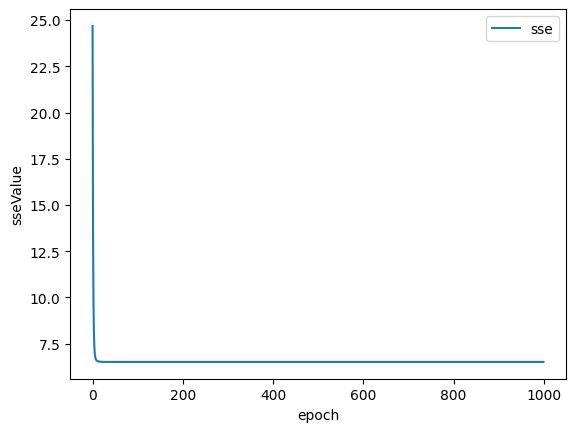

In [162]:
sgd_nox.plotSSE()

Use the learn weights to make predictions for the test set, and evaluate the model using the root mean squared error (remember that the bias is the first column of the weight matrix)
- You can use the function you coded for your coursework, but feel free to use sklearn's `mean_squared_error()` here

In [163]:
# your code here
def rmse(y_test, y_predicted):

    vector = y_test - y_predicted

    # Squares each difference to eliminate negative values
    vector = vector * vector

    # Computes the Root Mean Squared Error (RMSE)
    # First, it sums all the squared errors and divides by the total count (vector.size) to get the mean
    # Then, it applies the square root to finalize the RMSE calculation
    RMSE = (vector.sum() / vector.size) ** (1 / 2)

    # Displays the RMSE value, which indicates how well the model is predicting the data
    return(RMSE)


y_predicted_SGD = sgd_nox.predict(X_test)
y_predicted_PI = pi_nox.predict(X_test)

print(f"sse : {sgd_nox.sse_history[len(sgd_nox.sse_history) - 1]}")
print(f"rmse SGD: {rmse(y_test, y_predicted_SGD)}")
print(f"rmse PI: {rmse(y_test, y_predicted_PI)}")



sse : 6.509861375366079
rmse SGD: 1.0683841073913691
rmse PI: 0.16187977065183148


Repeat the same analysis for predicting `MEDV`

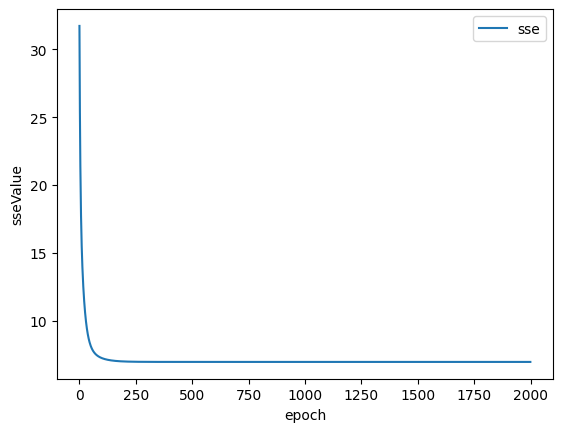

sse : 6.951361247156701
rmse SGD: 23.738673952154276
rmse PI: 16.525976489962915


In [164]:
# your code here
X_features = X.drop('MEDV', axis=1)
y = X['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.6, random_state=42, shuffle=True)

sgd_medv = SGD(X_train, y_train, 0.001, max_iter=2000)
pi_medv = PI(X_train, y_train)


y_predicted_SGD = sgd_medv.predict(X_test)
y_predicted_PI = pi_medv.predict(X_test)
sgd_medv.plotSSE()
print(f"sse : {sgd_medv.sse_history[len(sgd_medv.sse_history) - 1]}")
print(f"rmse SGD: {rmse(y_test, y_predicted_SGD)}")
print(f"rmse PI: {rmse(y_test, y_predicted_PI)}")



## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



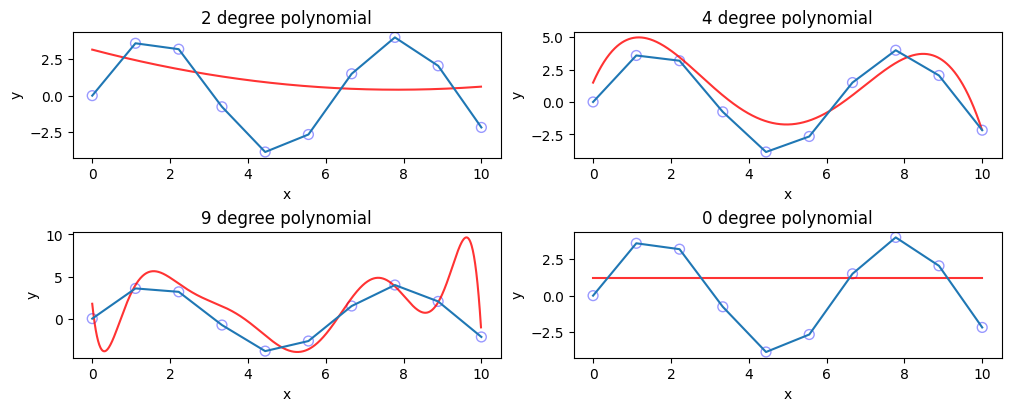

In [165]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

def linear_regression_PI_degree_M(x, y, M):
    
    N = len(x)
    PHI = np.ones((N,M + 1)) # Criando uma matriz de 1's do tamanho N * M
    for i in range(N):
        for j in range(0, M + 1):
            PHI[i, j] = x[i] ** j
    PSI = np.linalg.inv(PHI.T @ PHI) @ PHI.T
    w = PSI @ y

    return w


def predict_PI_degree_M(x, w):
   
    N = len(x)
    M = len(w) - 1

    PHI = np.ones((N,M + 1)) # Criando uma matriz de 1's do tamanho N * M
    
    for i in range(N):
        for j in range(0, M + 1):
            PHI[i, j] = x[i] ** j
    
    y_predicted = PHI @ w

    return y_predicted


def create_function_values(w):
    y = []
    x = []
    for j in range(1000):
        x_value = j / 1000 * 10
        x.append(x_value)
        y_value = 0
        for k in range(len(w)):
            y_value += w[k] * (x_value ** k)
        y.append(y_value)
    
    return x, y


numPoints = 10
x = np.linspace(0, 10, num=numPoints)
noise = np.random.normal(0, 1, numPoints)
y = 4 * np.sin(x) + noise

fig, axes = plt.subplots(2, 2, figsize=(10,4), constrained_layout=True)

degrees = [2,4,9,0]

for index, i in enumerate(degrees):

    row, col = divmod(index, 2)  # Compute row and column index (gets the quocient and the remainder)

    ax = axes[row, col]
    ax.scatter(x, 4 * np.sin(x), label = 'True Function', color='green', alpha=0.4, edgecolors='blue', facecolors='none', s=50)

    # Creating an weight value
    w = linear_regression_PI_degree_M(x,y,i)

    x2, y2 = create_function_values(w)

    ax.plot(x2, y2, label='Predicted Points', color = 'red', alpha=0.8)
    ax.plot(x, 4 * np.sin(x))
    ax.set_title(f'{i} degree polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

#plt.legend()
plt.show()


## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

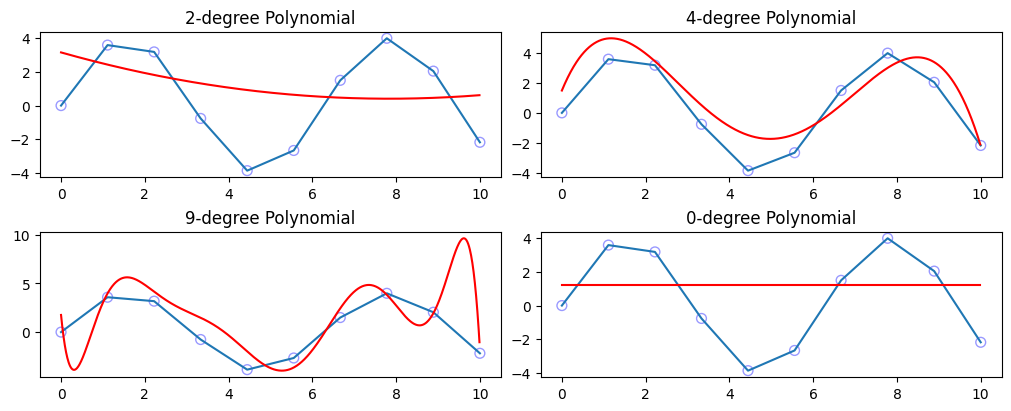

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

numPoints = 10 # defining the number of points in our system

# Generating the data
np.random.seed(0)
x = np.linspace(0,10,num=numPoints)
noise = np.random.normal(0,1,numPoints)
y = 4 * np.sin(x) + noise
x = x.reshape(-1,1) 

fig, axes = plt.subplots(2,2,figsize=(10,4), constrained_layout=True)

degrees = [2,4,9,0]

for index, i in enumerate(degrees):

    row, col = divmod(index, 2)  # Compute row and column index (gets the quocient and the remainder)

    ax = axes[row,col]
    ax.scatter(x, 4 * np.sin(x), label = 'True Function', color='green', alpha=0.4, edgecolors='blue', facecolors='none', s=50)

    # Creating the polynomial Transformation
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)

    # Defining the model
    model = LinearRegression()
    model.fit(x_poly, y) #training it

    # creating the test data
    x_test = []
    for j in range(1000):
        x_value = j / 1000 * 10
        x_test.append(x_value)
    x_test = np.array(x_test).reshape(-1,1)

    x_test_poly = poly.fit_transform(x_test.reshape(-1,1))
    
    y_pred = model.predict(x_test_poly)

    # Ploting the data 
    ax.set_title(f'{i}-degree Polynomial')
    ax.plot(x, 4 * np.sin(x), label='function')
    ax.plot(x_test, y_pred, label='predicted', color='red')

plt.show()